<a href="https://colab.research.google.com/github/asrithsai-0429/codsoft-internship/blob/main/codsoft_internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task - 1 (Titanic Survival Prediction)

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
titanic_df = pd.read_csv('/content/Titanic-Dataset.csv')
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [27]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [28]:
titanic_df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [29]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [30]:
titanic_df.shape

(891, 12)

In [31]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: >

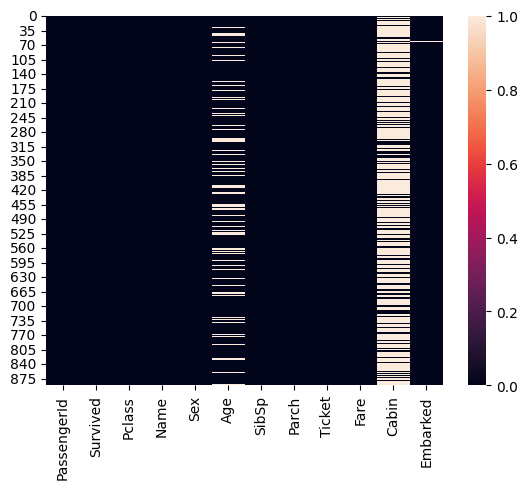

In [32]:
sns.heatmap(titanic_df.isnull())

In [33]:
ports = pd.get_dummies(titanic_df.Embarked,prefix='Embarked',dtype=int)
ports

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [34]:
ports.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [35]:
titanic_df = titanic_df.join(ports)
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,0,0


In [36]:
titanic_df.drop(['Embarked'],axis=1,inplace=True)

In [37]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,0,1


In [38]:
titanic_df.Sex = titanic_df.Sex.map({'male':0,'female':1})

In [39]:
titanic_df['Sex']

,Sex
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,1
889,0


In [40]:
Y = titanic_df.Survived.copy()
X = titanic_df.drop(['Survived'],axis=1)

In [41]:
X.drop(['Name','Ticket','Cabin','PassengerId'],axis=1,inplace=True)

In [42]:
X.isnull().sum()

,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked_C,0
Embarked_Q,0
Embarked_S,0


In [43]:
X.Age.fillna(X.Age.mean(),inplace=True)

<ipython-input-43-d9dd57ff4da2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X.Age.fillna(X.Age.mean(),inplace=True)


In [44]:
X.isnull().sum()

,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked_C,0
Embarked_Q,0
Embarked_S,0


In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=7)

In [46]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
model.score(X_train,Y_train)

0.8089887640449438

In [48]:
Y_pred_test = model.predict(X_test)
Y_pred_test

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1])

In [49]:
Y_test

,Survived
725,0
861,0
528,0
46,0
627,1
...,...
809,1
305,1
538,0
825,0


In [50]:
from sklearn.metrics import accuracy_score
print('model accuracy score: {0:0.4f}'.format(accuracy_score(Y_test,Y_pred_test)))

model accuracy score: 0.7542


Task - 2 (IRIS Flower Classification)

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [52]:
tk2_df =pd.read_csv('/content/IRIS.csv')
tk2_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [53]:
tk2_df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [54]:
tk2_df.tail(5)

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [55]:
tk2_df['species'].value_counts()

,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


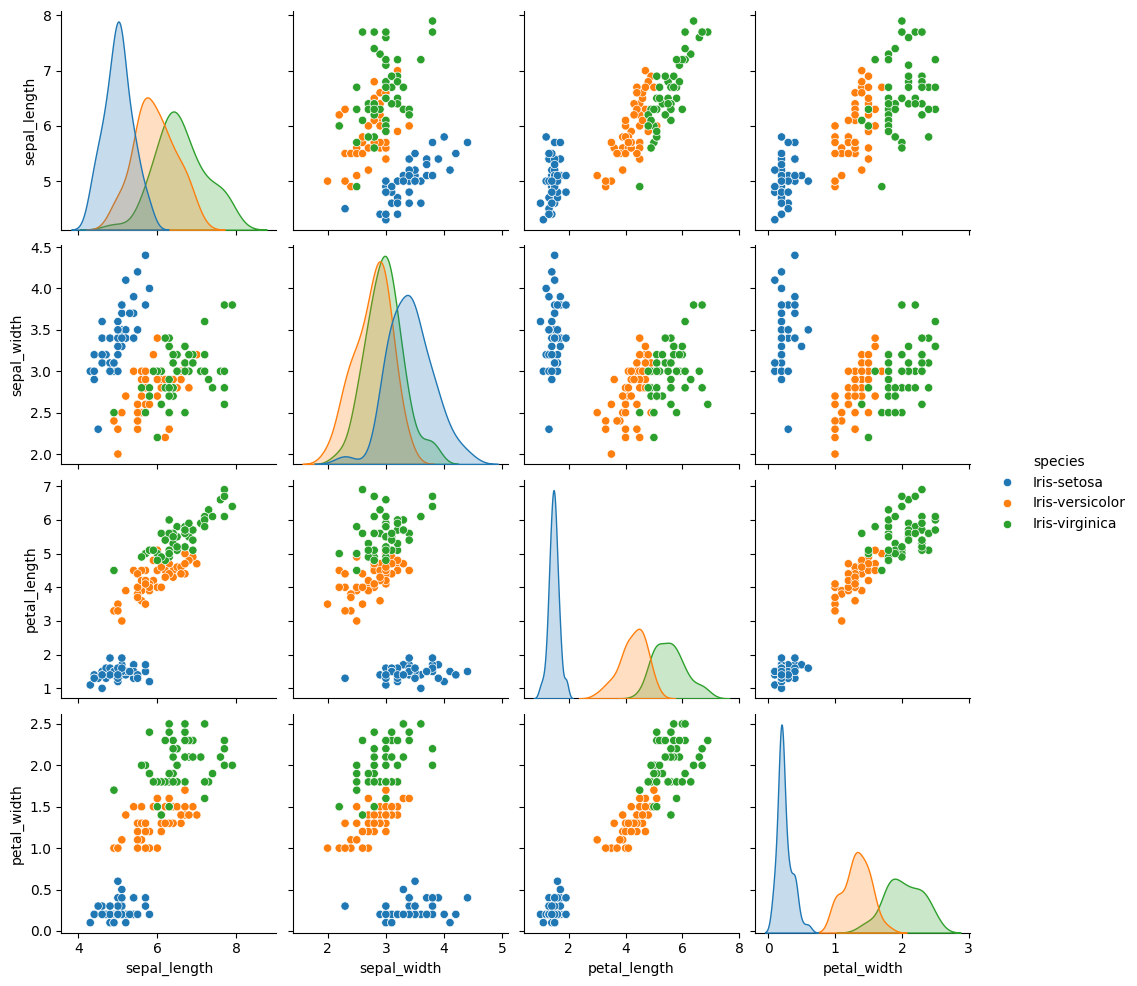

In [56]:
sns.pairplot(tk2_df,hue='species')

In [57]:
X = tk2_df[["sepal_length","sepal_width","petal_length","petal_width"]]
y = tk2_df["species"]

In [58]:
print(X)
print(y)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: obj

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train

,sepal_length,sepal_width,petal_length,petal_width
137,6.4,3.1,5.5,1.8
84,5.4,3.0,4.5,1.5
27,5.2,3.5,1.5,0.2
127,6.1,3.0,4.9,1.8
132,6.4,2.8,5.6,2.2
...,...,...,...,...
9,4.9,3.1,1.5,0.1
103,6.3,2.9,5.6,1.8
67,5.8,2.7,4.1,1.0
117,7.7,3.8,6.7,2.2


In [60]:
X_test

,sepal_length,sepal_width,petal_length,petal_width
114,5.8,2.8,5.1,2.4
62,6.0,2.2,4.0,1.0
33,5.5,4.2,1.4,0.2
107,7.3,2.9,6.3,1.8
7,5.0,3.4,1.5,0.2
100,6.3,3.3,6.0,2.5
40,5.0,3.5,1.3,0.3
86,6.7,3.1,4.7,1.5
76,6.8,2.8,4.8,1.4
71,6.1,2.8,4.0,1.3


In [61]:
ML = KNeighborsClassifier(n_neighbors=10)
ML.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [62]:
X_train_prediction = ML.predict(X_train)
print(X_train_prediction)

['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-v

In [63]:
print(y_train)

137     Iris-virginica
84     Iris-versicolor
27         Iris-setosa
127     Iris-virginica
132     Iris-virginica
            ...       
9          Iris-setosa
103     Iris-virginica
67     Iris-versicolor
117     Iris-virginica
47         Iris-setosa
Name: species, Length: 120, dtype: object


In [64]:
X_test_prediction = ML.predict(X_test)
print(X_test_prediction)

['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa']


In [65]:
print(y_test)

114     Iris-virginica
62     Iris-versicolor
33         Iris-setosa
107     Iris-virginica
7          Iris-setosa
100     Iris-virginica
40         Iris-setosa
86     Iris-versicolor
76     Iris-versicolor
71     Iris-versicolor
134     Iris-virginica
51     Iris-versicolor
73     Iris-versicolor
54     Iris-versicolor
63     Iris-versicolor
37         Iris-setosa
78     Iris-versicolor
90     Iris-versicolor
45         Iris-setosa
16         Iris-setosa
121     Iris-virginica
66     Iris-versicolor
24         Iris-setosa
8          Iris-setosa
126     Iris-virginica
22         Iris-setosa
44         Iris-setosa
97     Iris-versicolor
93     Iris-versicolor
26         Iris-setosa
Name: species, dtype: object


In [66]:
train_accuracy = accuracy_score(X_train_prediction, y_train)
test_accuracy = accuracy_score(X_test_prediction, y_test)
print("Accuracy scores of traning and test data are", train_accuracy, 'and' , test_accuracy, 'respectively')

Accuracy scores of traning and test data are 0.9666666666666667 and 1.0 respectively


In [67]:
from sklearn.metrics import classification_report

print(classification_report(y_train, X_train_prediction))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        39
Iris-versicolor       0.97      0.92      0.94        37
 Iris-virginica       0.93      0.98      0.96        44

       accuracy                           0.97       120
      macro avg       0.97      0.97      0.97       120
   weighted avg       0.97      0.97      0.97       120



In [68]:
print(classification_report(y_test, X_test_prediction))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [69]:
6print("write sepal length")
a = input()
print("write sepal width")
b = input()
print("write petal length")
c = input()
print("write petal width")
d = input()

data =pd.DataFrame({'sepal_length':[a],'sepal_width':[b],'petal_length':[c],'petal_width':[d]})
prediction = ML.predict(data)
print(prediction)

write sepal length
12
write sepal width
4
write petal length
2
write petal width
6
['Iris-virginica']


Task-3 (Sales Prediction)

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
tk3_df = pd.read_csv('/content/advertising.csv')
tk3_df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [3]:
tk3_df.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
tk3_df.tail(5)

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [5]:
tk3_df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
tk3_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
tk3_df.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [8]:
tk3_df.shape

(200, 4)

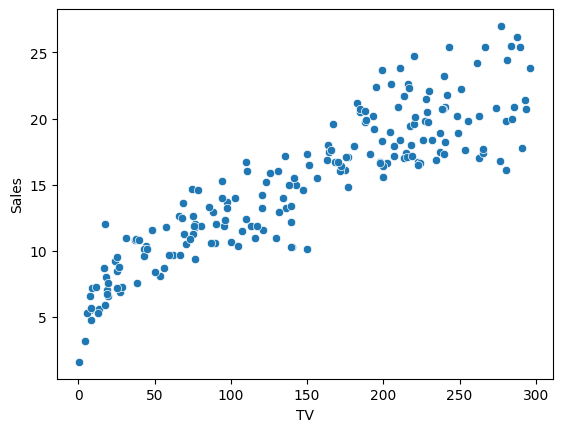

In [9]:
sns.scatterplot(x = tk3_df['TV'], y = tk3_df['Sales'])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

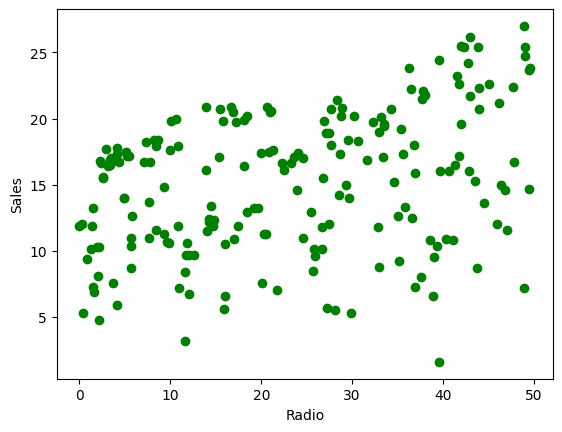

In [10]:
plt.scatter(tk3_df['Radio'], tk3_df['Sales'],color='g')
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.show

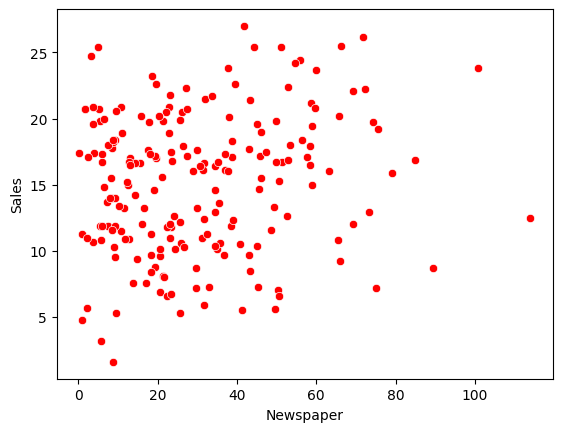

In [11]:
sns.scatterplot(x = tk3_df['Newspaper'], y = tk3_df['Sales'],color ='r')
plt.show()

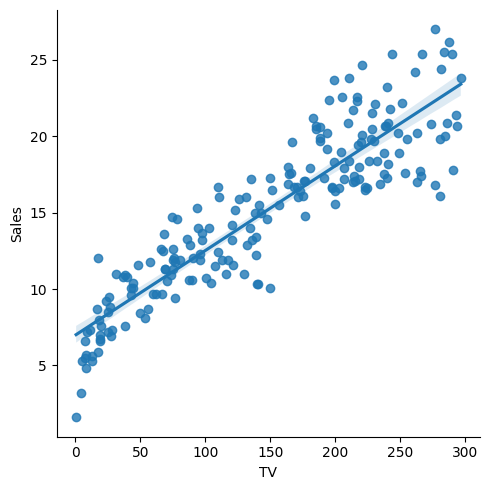

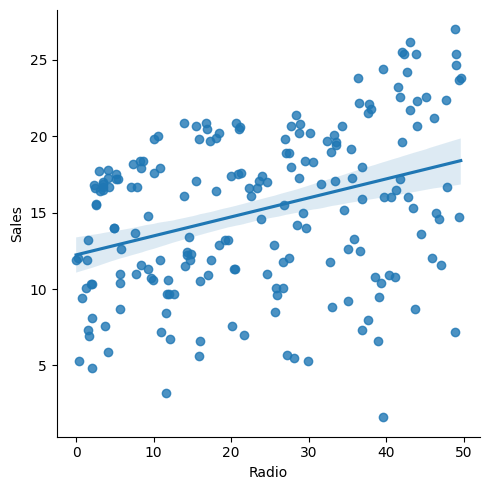

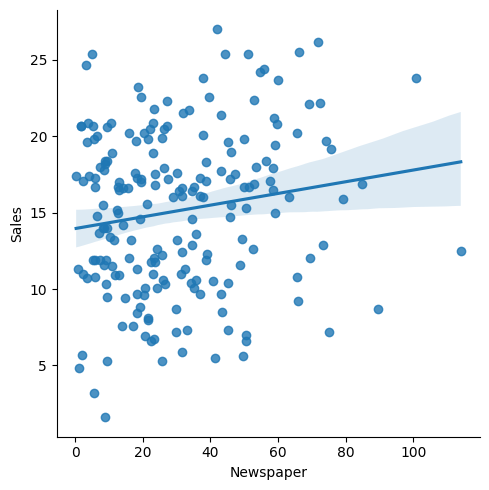

In [12]:
sns.lmplot(x = 'TV', y = 'Sales', data = tk3_df)
sns.lmplot(x = 'Radio', y = 'Sales', data = tk3_df)
sns.lmplot(x = 'Newspaper', y = 'Sales', data = tk3_df)

Text(0.5, 1.0, 'Sales')

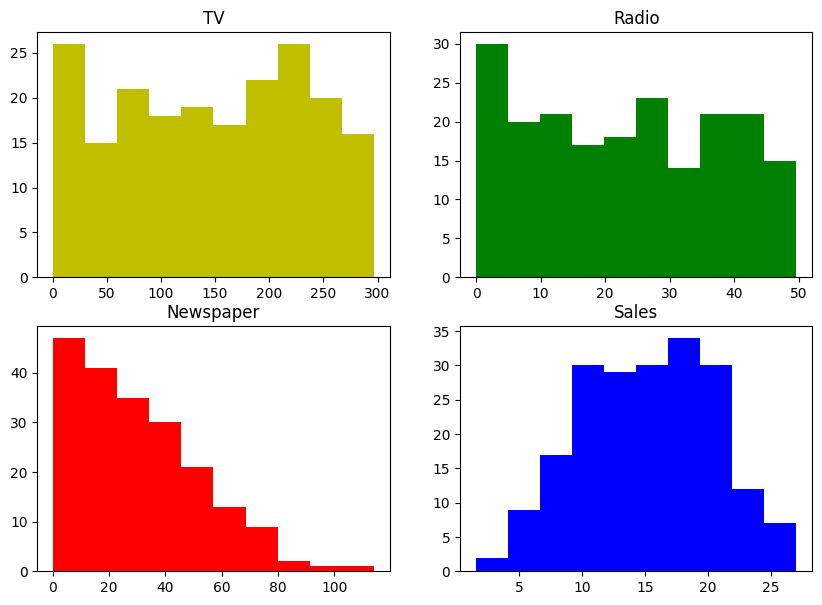

In [13]:
plt.figure(figsize=(10,7))

plt.subplot(221)
plt.hist(tk3_df['TV'], color = 'y')
plt.title('TV')

plt.subplot(222)
plt.hist(tk3_df['Radio'], color = 'g')
plt.title('Radio')

plt.subplot(223)
plt.hist(tk3_df['Newspaper'], color = 'r')
plt.title('Newspaper')

plt.subplot(224)
plt.hist(tk3_df['Sales'], color = 'b')
plt.title('Sales')

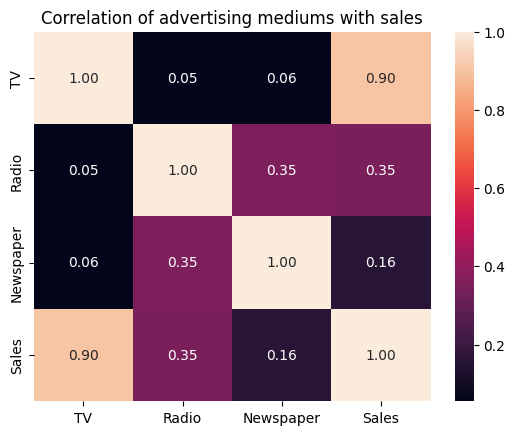

In [14]:
sns.heatmap(tk3_df.corr(), annot = True,fmt='.2f')
plt.title('Correlation of advertising mediums with sales')
plt.show()

In [15]:
X =tk3_df[['TV']]
y =tk3_df['Sales']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [17]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

        TV
134   36.9
66    31.5
26   142.9
113  209.6
168  215.4
..     ...
67   139.3
192   17.2
117   76.4
47   239.9
172   19.6

[160 rows x 1 columns]
        TV
18    69.2
170   50.0
107   90.4
98   289.7
177  170.2
182   56.2
5      8.7
146  240.1
12    23.8
152  197.6
61   261.3
125   87.2
180  156.6
154  187.8
80    76.4
7    120.2
33   265.6
130    0.7
37    74.7
74   213.4
183  287.6
145  140.3
45   175.1
159  131.7
60    53.5
123  123.1
179  165.6
185  205.0
122  224.0
44    25.1
16    67.8
55   198.9
150  280.7
111  241.7
22    13.2
189   18.7
129   59.6
4    180.8
83    68.4
106   25.0
134    10.8
66     11.0
26     15.0
113    20.9
168    17.1
       ... 
67     13.4
192     5.9
117     9.4
47     23.2
172     7.6
Name: Sales, Length: 160, dtype: float64
18     11.3
170     8.4
107    12.0
98     25.4
177    16.7
182     8.7
5       7.2
146    18.2
12      9.2
152    16.6
61     24.2
125    10.6
180    15.5
154    20.6
80     11.8
7      13.2
33     17.4
130     1.6
37  

In [18]:
ML = LinearRegression()
ML.fit(X_train, y_train)

LinearRegression()

In [19]:
X_train_prediction = ML.predict(X_train)
print(X_train_prediction)

[ 9.1709017   8.87695647 14.94093769 18.57170561 18.88742456 12.75267876
  7.63041096  8.08221567 14.0046677  12.85610393 13.1391623  19.65494821
 20.97770175 17.22717836  9.59548926 10.55353297 23.10608294 16.55219302
 18.18522207  7.55964637 21.59825279 17.91849399 19.0561709  15.18044861
 16.48687185 19.01262345 21.46216703 16.0622843  12.62747986 11.31561319
 17.22717836 14.47280269 22.06094435 23.296603   12.39885579 13.1391623
 21.06479663 18.27231695 20.23195181 17.70620021 17.56467103 12.04503283
  9.50295094  9.24166629  7.87536532 20.18840437  8.09854596 18.63158334
  8.55579409 16.79714737 18.424733   10.76038331 15.31109094 14.20607461
 12.28998719 22.22424726 22.23513412  7.58686352 20.81984227 16.72638278
  7.7991573  11.27206575 18.03824945 19.6876088  13.00851997 19.4535413
 16.05139744 14.29861292 18.41928957 16.79714737 18.96363258 10.80393075
 19.52974932 17.67898306 12.46962039 11.82729563 19.58962705 14.75586106
  9.79145274 19.05072747 17.79873853  7.4562212  20.1

In [20]:
print(y_train)

134    10.8
66     11.0
26     15.0
113    20.9
168    17.1
       ... 
67     13.4
192     5.9
117     9.4
47     23.2
172     7.6
Name: Sales, Length: 160, dtype: float64


In [21]:
print(ML.coef_)
print(ML.intercept_)

[0.0544343]
7.162275968528906


In [22]:
X_test_prediction = ML.predict(X_test)
print(X_test_prediction)

[10.92912965  9.88399105 12.08313684 22.93189318 16.42699412 10.22148373
  7.63585439 20.23195181  8.45781235 17.91849399 21.38595901 11.90894708
 15.68668762 17.38503783 11.32105662 13.70527904 21.62002651  7.20037998
 11.22851831 18.77855596 22.81758114 14.7994085  16.6937222  14.33127351
 10.07451111 13.86313851 16.17659633 18.32130782 19.35555956  8.52857694
 10.85292163 17.98925858 22.44198446 20.3190467   7.88080875  8.18019741
 10.40656035 17.00399772 10.88558221  8.52313351]


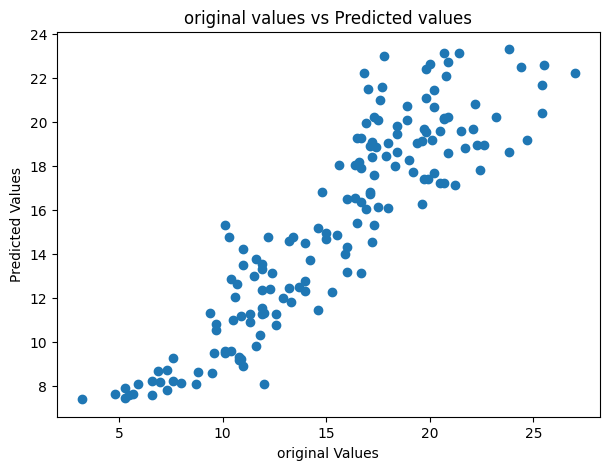

In [23]:
plt.figure(figsize=(7,5))
plt.scatter(y_train, X_train_prediction)
plt.xlabel('original Values')
plt.ylabel('Predicted Values')
plt.title('original values vs Predicted values')
plt.show()

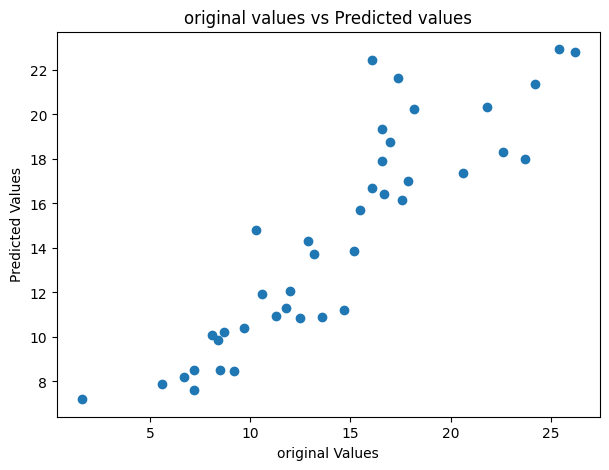

In [24]:
plt.figure(figsize=(7,5))
plt.scatter(y_test, X_test_prediction)
plt.xlabel('original Values')
plt.ylabel('Predicted Values')
plt.title('original values vs Predicted values')
plt.show()